In [1]:
import numpy as np
import time

import torch

import gym
import rl_gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from stable_baselines3 import A2C, DQN, PPO
from stable_baselines3.common import env_checker
from stable_baselines3.common.evaluation import evaluate_policy

In [2]:

#env = gym.make("CartPole-v1")

env = gym.wrappers.TimeLimit(gym.make("rl_gym/PuckWorld-v0", fps=60), max_episode_steps=600)
#env_checker.check_env(env,skip_render_check=False)

device = torch.device("cpu")

pygame 2.1.0 (SDL 2.0.16, Python 3.8.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:

print("DQN")
print("-------------")

model = DQN("MlpPolicy", env, verbose=0, device=device)

# Evaluate random Agent, before training
eval_env = gym.wrappers.TimeLimit(gym.make("rl_gym/PuckWorld-v0", fps=60), max_episode_steps=600)
start_time = time.time()
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print("--- %.1f seconds ---" % (time.time() - start_time))
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# Learn
print("train")
start_time = time.time()
model.learn(total_timesteps=600*1000)
print("--- %.1f minutes ---" % ((time.time() - start_time)/60))

#evaluate
print("evaluate")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")





DQN
-------------


C:\Users\remyh\anaconda3\envs\tfgpu\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


--- 16.2 seconds ---
mean_reward:-759.06 +/- 397.94
train
--- 8.7 minutes ---
evaluate
mean_reward:-171.37 +/- 85.99


In [4]:
print("A2C")
print("-------------")

model = A2C("MlpPolicy", env, verbose=0, device=device)

# Evaluate random Agent, before training
eval_env = gym.wrappers.TimeLimit(gym.make("rl_gym/PuckWorld-v0", fps=60), max_episode_steps=600)
start_time = time.time()
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print("--- %.1f seconds ---" % (time.time() - start_time))
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# Learn
print("train")
start_time = time.time()
model.learn(total_timesteps=600*1000)
print("--- %.1f minutes ---" % ((time.time() - start_time)/60))

#evaluate
print("evaluate")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

A2C
-------------
--- 26.1 seconds ---
mean_reward:-847.26 +/- 371.57
train
--- 11.0 minutes ---
evaluate
mean_reward:-261.86 +/- 72.10


In [5]:
print("PPO")
print("-------------")

model = PPO("MlpPolicy", env, verbose=0, device=device)

# Evaluate random Agent, before training
eval_env = gym.wrappers.TimeLimit(gym.make("rl_gym/PuckWorld-v0", fps=60), max_episode_steps=600)
start_time = time.time()
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print("--- %.1f seconds ---" % (time.time() - start_time))
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# Learn
print("train")
start_time = time.time()
model.learn(total_timesteps=600*1000)
print("--- %.1f minutes ---" % ((time.time() - start_time)/60))

#evaluate
print("evaluate")
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=100)
print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")


PPO
-------------
--- 25.2 seconds ---
mean_reward:-642.26 +/- 334.61
train
--- 12.3 minutes ---
evaluate
mean_reward:-258.01 +/- 64.26


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.20it/s]

--- 31.263916969299316 seconds ---
-272.26832309072563 98.34877139670182


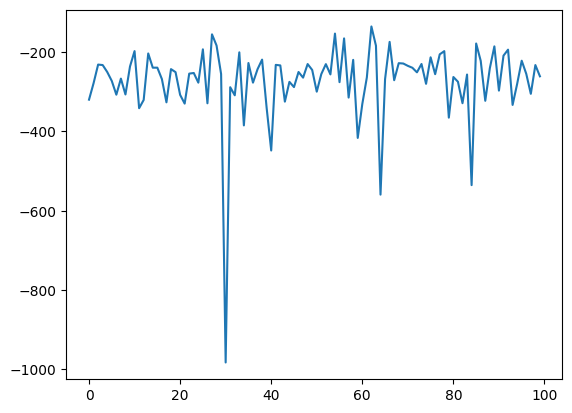

In [6]:
#env = model.get_env()
num_episodes = 100
log = []
start_time = time.time()
for episode in tqdm(range(num_episodes)):

    obs = env.reset()
    episode_score = 0
    terminated = False

    while not terminated:
        action, _state = model.predict(obs, deterministic=True)
        obs, reward, terminated, info = env.step(action)
        episode_score += reward
        env.render(mode=None)

    log.append(episode_score)

env.close()    
print("--- %s seconds ---" % (time.time() - start_time))

plt.plot(log)
print(np.mean(log), np.std(log)) 


In [43]:
log

[[600, -523.1592318476892],
 [600, -329.2297360696973],
 [600, -391.49119353011395],
 [600, -456.1807078923572],
 [600, -455.820090663924],
 [600, -382.6230263160278],
 [600, -283.3490799115924],
 [600, -469.3894873662883],
 [600, -661.2731908177146],
 [600, -474.6471475259257]]